---
## **Informasi Dataset**
---

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load data
data = pd.read_csv('produk_elektronik.csv')
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [37]:
# menampilkan informasi data setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


---
## **Menangani *Missing Value***
---

### Mengecek *Missing Value* dalam Dataset
---

In [38]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [39]:
# mengecek jumlah missing value setiap kolom
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


---
### Dampak *Missing Value* terhadap Analisis Data
---


*Missing Value* dalam dataset dapat memengaruhi data dalam berbagai aspek, tergantung pada jumlah dan distribusinya. Beberapa dampak utama adanya *missing value* yaitu:


1.   Jika data yang hilang tidak tersebar secara acak, maka hasil analisis bisa menjadi **bias**. Misalnya, hanya produk dengan harga tinggi yang memiliki *missing value*, maka rata-rata harga yang dihitung bisa lebih rendah dari nilai sebenarnya.
2.   Dapat terjadi kesalahan dalam model prediktif karena model *machine learning* sering kali tidak dapat menangani nilai *missing values* secara langsung. Jika *missing values* dihapus secara sembarangan, dapat menyebabkan kehilangan pola penting dalam data.
3.   Terlalu banyak data yang dihapus karena *missing value*, dapat menyebabkan kehilangan banyak informasi berharga. Metode imputasi (mengisi nilai yang hilang) seperti mean, median, atau regresi bisa menjadi solusi untuk kasus ini.
4.   Jika banyak data yang hilang, grafik seperti histogram atau *scatter plot* bisa menjadi tidak akurat.

---
### Metode Penanganan *Missing Value*
---   

Untuk memilih metode yang paling sesuai dalam menangani *missing value* di setiap kolom, perlu mempertimbangkan jenis data dan distribusinya. Berikut metode yang bisa digunakan:
1.   Kolom 'harga' (30 *missing values*, data numerik)

   Metode yang sesuai: imputasi dengan median, karena harga biasanya memiliki distribusi yang tidak simetris (skewed), sehingga median lebih robust dibandingkan mean. Jika harga memiliki outlier, penggunaan mean bisa menghasilkan nilai yang tidak representatif.
2.   Kolom 'rating' (50 *missing values*, data numerik)

   Metode yang sesuai: imputasi dengan mean atau modus. Jika rating memiliki distribusi normal, bisa menggunakan mean. Sedangkan, jika rating memiliki nilai diskrit (misal 1-5 bintang), lebih baik menggunakan modus.
3.   Kolom 'jumlah_ulasan' (20 *missing value*, data numerik)

   Metode yang sesuai: imputasi dengan 0 atau median. Jika jumlah ulasan hilang karena produk belum memiliki ulasa, maka bisa diisi dengan 0. Sedangkan, jika ingin mempertahankan pola distribusi data, maka gunakan median.

---
### *Handling Missing Value*
---

In [40]:
# Mengisi missing values pada kolom harga dengan median
data['harga'].fillna(data['harga'].median(), inplace=True)

# Mengisi missing values pada kolom rating dengan modus (nilai yang paling sering muncul)
data['rating'].fillna(data['rating'].mode()[0], inplace=True)

# Mengisi missing values pada kolom 'jumlah_ulasan' dengan 0 atau median (pilih salah satu)
data['jumlah_ulasan'].fillna(0, inplace=True)  # Jika dianggap belum ada ulasan
# data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median(), inplace=True)  # Jika ingin mempertahankan distribusi

# Mengecek kembali apakah masih ada missing values
print(data.isnull().sum())

produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64


<ipython-input-40-05da9cbd64da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['harga'].fillna(data['harga'].median(), inplace=True)
<ipython-input-40-05da9cbd64da>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

---
## **Identifikasi dan Penanganan Outlier**
---

---
### Identifikasi Outlier dalam Dataset
---

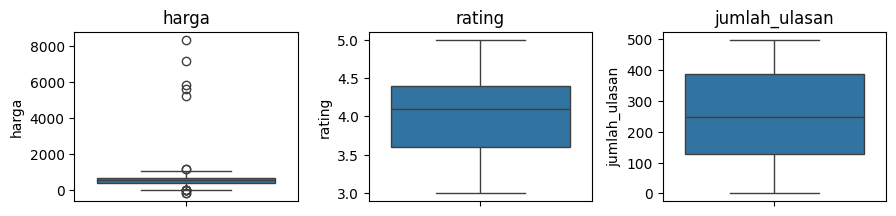

In [41]:
# Kolom numerik yang akan dicek otliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Membuat boxplot untuk semua kolom numerik
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [42]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


---
### Dampak Outlier terhadap Analisis
---

*Outlier* dapat memengaruhi hasil analisis data dengan berbagai cara tergantung pada metode statistik yang digunakan. Berikut beberapa dampaknya:
1.   Memengaruhi Statistik Deskriptif
   
   Mean dapat menjadi tidak representatif terhadap data sebenarnya apabila terdapat outlier yang sangat besar atau kecil. Jika ingin menghindari bias akibat outlier, gunakan median karena lebih tahan terhadap outlier.
2.   Memengaruhi Hasil *Machine Learning*
   
   Model regresi linier menjadi tidak akurat karena adanya satu atau dua nilai ekstrem yang dapat mengubah garis regresi secara signifikan. Sementara itu, K-Means clustering dan algoritma berbasis jarak seperti KNN bisa salah dalam mengelompokkan data karena *outlier* mengubah distribusi data.
3.   Menyebabkan Kesalahan dalam Visualisasi
   
   Jika *outlier* sangat jauh dari data lain, maka skala grafik bisa menjadi tidak proporsional, membuat pola utama pada *boxplot* dan *scatter plot* sulit terlihat.
4.   Menyebabkan Kesalahan dalam Mengambil Keputusan

   Misalnya, jika sebuah perusahaan melihat rata-rata rating produk tinggi karena beberapa rating ekstrem 5.0, sedangkan mayoritas rating sebenarnya di bawah 3.0, maka keputusan yang diambil bisa salah.



---
### Metode Penanganan Outlier
---

Setelah *outlier* diidentifikasi, ada beberapa metode untuk menanganinya:
1.   Mengubah (Winsorizing) atau Transformasi Data

   Mengubah nilai *outlier* agar tetap dalam batas tertentu. Bisa menggunakan Winsorizing (mengganti outlier dengan batas IQR) atau melakukan trransformasi logaritmik jika distribusi data sangat skewed (tidak simetris). Metode ini digunakan jika outlier memang bagian dari data tapi terlalu ekstrem atau jika tidak ingin kehilangan data tetapi tetap ingin mengurangi dampak outlier.
2.   Menghapus *Outlier* (Jika Jumlahnya Sedikit dan Tidak SIgnifikan)
   
   Jika jumlah *outlier* sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus. Metode ini digunakan jika *outlier* berasal dari data yang tidak relevan untuk analisis. Hal ini bisa memengaruhi dimensi data karena menghapus *outlier* bisa berbahaya jika ternyata *outlier* mengandung informasi penting.
3.   Membiarkan *Outlier* Tetap Ada (Jika Bermakna)
   
   Tidak menghapus atau mengubah *outlier* jika memang *outlier* tersebut memiliki makna. Hanya melakukan analisis dengan median, bukan mean, agar tidak terpengaruh. Metode ini digunakan jika dataset memang memiliki distribusi yang alami dengan variabilitas tinggi. Kelemahan dari metode ini, hasil analisis tetap bisa bias jika tidak hati-hati.

---
### Menangani Outlier
---

In [43]:
# Winsorizing (Mengganti Outlier dengan Batas IQR)
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

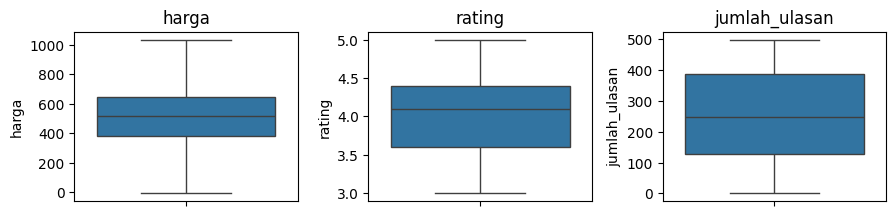

In [44]:
# Cek boxplot lagi
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

---
## **Encoding Variabel Kategorikal**
---

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam analisis dan algoritma *machine learning*. Model *machine learning* umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.

---
### Menentukan Kolom yang Memerlukan Encoding
---

In [45]:
# melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [46]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

---
### Memilih dan Menerapkan Metode Encoding
---

In [47]:
# One-Hot Encoding untuk 'kategori'
data = pd.get_dummies(data, columns=['kategori'], prefix='kategori')

Kategori ini tidak memiliki urutan, sehingga One-Hot Encoding (OHE) adalah metode yang paling sesuai.

In [48]:
# One-Hot Encoding untuk 'negara_asal'
data = pd.get_dummies(data, columns=['negara_asal'], prefix='negara')

Karena negara tidak memiliki urutan tertentu, kita bisa menggunakan One-Hot Encoding.
Namun, jika jumlah negara sangat banyak, OHE bisa menyebabkan Curse of Dimensionality.
Solusi lain adalah Label Encoding atau Regional Encoding dengan mengelompokkan negara berdasarkan wilayah.

In [50]:
# cek Hasil Encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   harga                550 non-null    float64
 3   rating               550 non-null    float64
 4   jumlah_ulasan        550 non-null    float64
 5   kategori_Camera      550 non-null    bool   
 6   kategori_Headphone   550 non-null    bool   
 7   kategori_Laptop      550 non-null    bool   
 8   kategori_Smartphone  550 non-null    bool   
 9   kategori_Smartwatch  550 non-null    bool   
 10  kategori_Tablet      550 non-null    bool   
 11  negara_Canada        550 non-null    bool   
 12  negara_China         550 non-null    bool   
 13  negara_France        550 non-null    bool   
 14  negara_Germany       550 non-null    bool   
 15  negara_India         550 non-null    boo